In [138]:
from diagrams.gcp.analytics import Bigquery
from diagrams.gcp.compute import Functions,Run
from diagrams import Cluster,Diagram, Edge
from diagrams.gcp.ml import AIPlatform
from diagrams import custom
from diagrams.gcp.devtools import Build,Scheduler
from diagrams.gcp.api import APIGateway

In [139]:
graph_attr = {
    "fontsize": "45",
    "bgcolor": "transparent"
}


with Diagram(show=False,direction="LR",graph_attr=graph_attr,curvestyle='ortho',) as diag:
    github = custom.Custom("Repository","./util/github.png")
    build = Build("CI/CD")
    github >> build
    apigate = APIGateway("Api Collection")
    schedule = Scheduler("scheduler")
    schedule - Edge(label = 'invoke',sytle='dotted') >> apigate
    with Cluster("Storage"):
        raw = Bigquery("Raw")
        research = Bigquery("Research")
        serving = Bigquery("Serving")
        raw >> research
        research >> serving
    func = Functions(f"Source")
    data = Run(f"Source")
    build >> data
    build >> func
    data >> apigate
    func >> apigate
    apigate >> raw
    with Cluster("Analytics"):
        with Cluster("Deployment") as deploy:
            vertex = custom.Custom("Vertex Ai","./util/vertex.png")
            kubeflow = custom.Custom("Kubeflow",'./util/kubeflow.png')
        kedro = custom.Custom("research project","./util/kedro (custom).png")
        research >> kedro
        kedro >> vertex >> serving
        kedro >> kubeflow >> serving
        
    with Cluster("Report"):
        stream = custom.Custom("Streamlit",'./util/streamlit.png')
        studio = custom.Custom("Data Studio",'./util/datastudio.png')
        serving >> studio
        serving >> stream

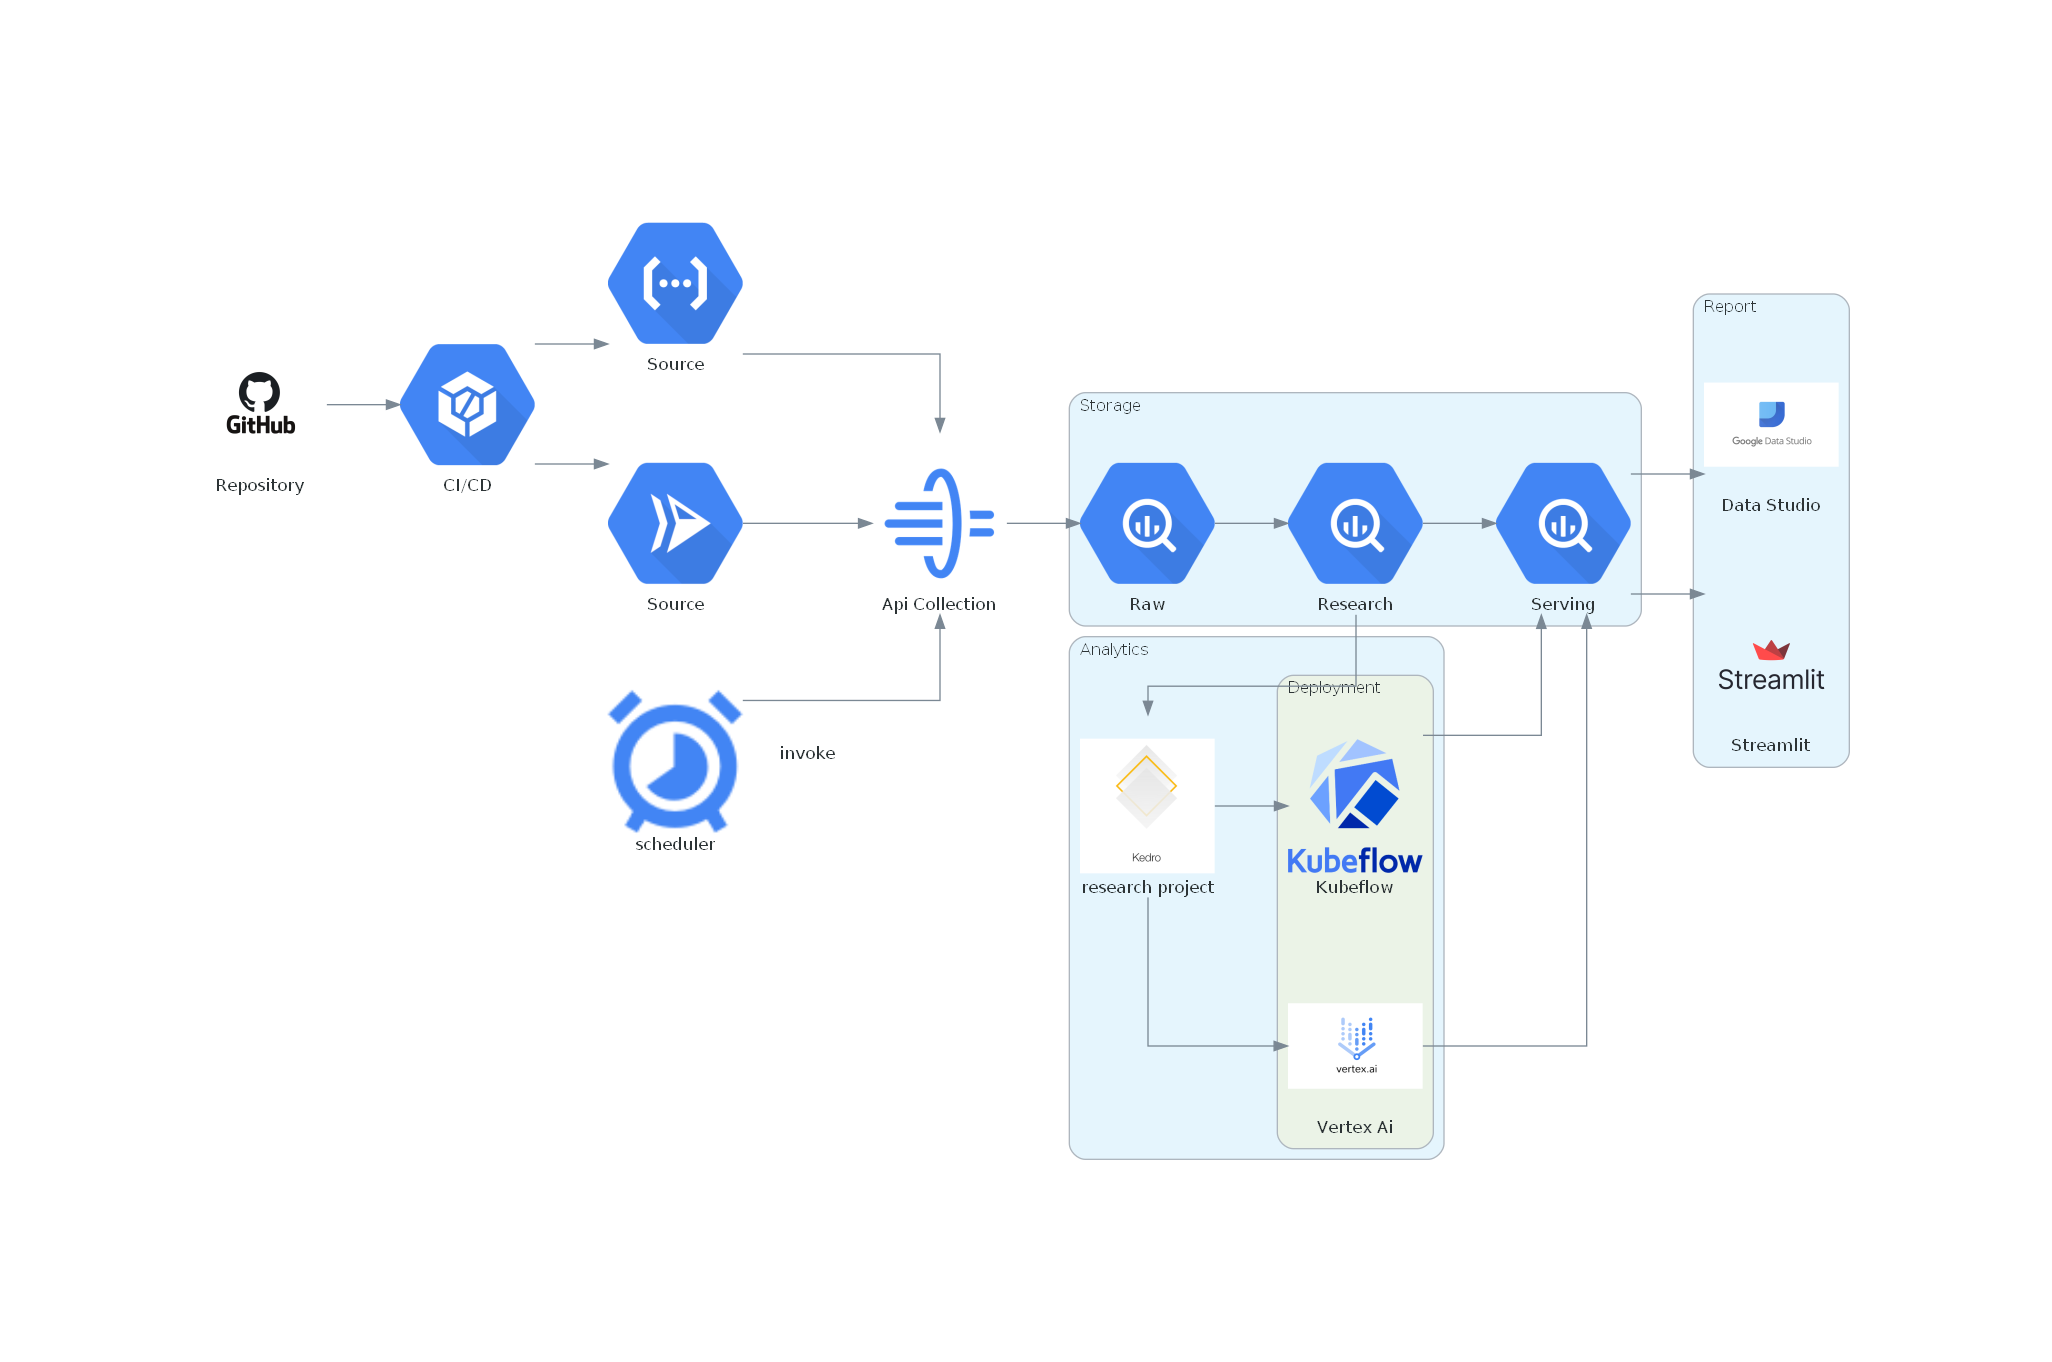

In [140]:
diag

In [136]:
with Diagram(show=False,direction="LR",graph_attr=graph_attr,curvestyle='ortho',) as diag:
    github = custom.Custom("Repository","./util/github.png")
    build = Build("CI/CD")
    github >> build
    apigate = APIGateway("Api Collection")
    schedule = Scheduler("scheduler")
    schedule - Edge(label = 'invoke',sytle='dotted') >> apigate
    with Cluster("Storage"):
        raw = Bigquery("Raw")
        research = Bigquery("Research")
        serving = Bigquery("Serving")
        raw >> research
        research >> serving
    func = Functions(f"Source")
    data = Run(f"Source")
    build >> data
    build >> func
    data >> apigate
    func >> apigate
    apigate >> raw

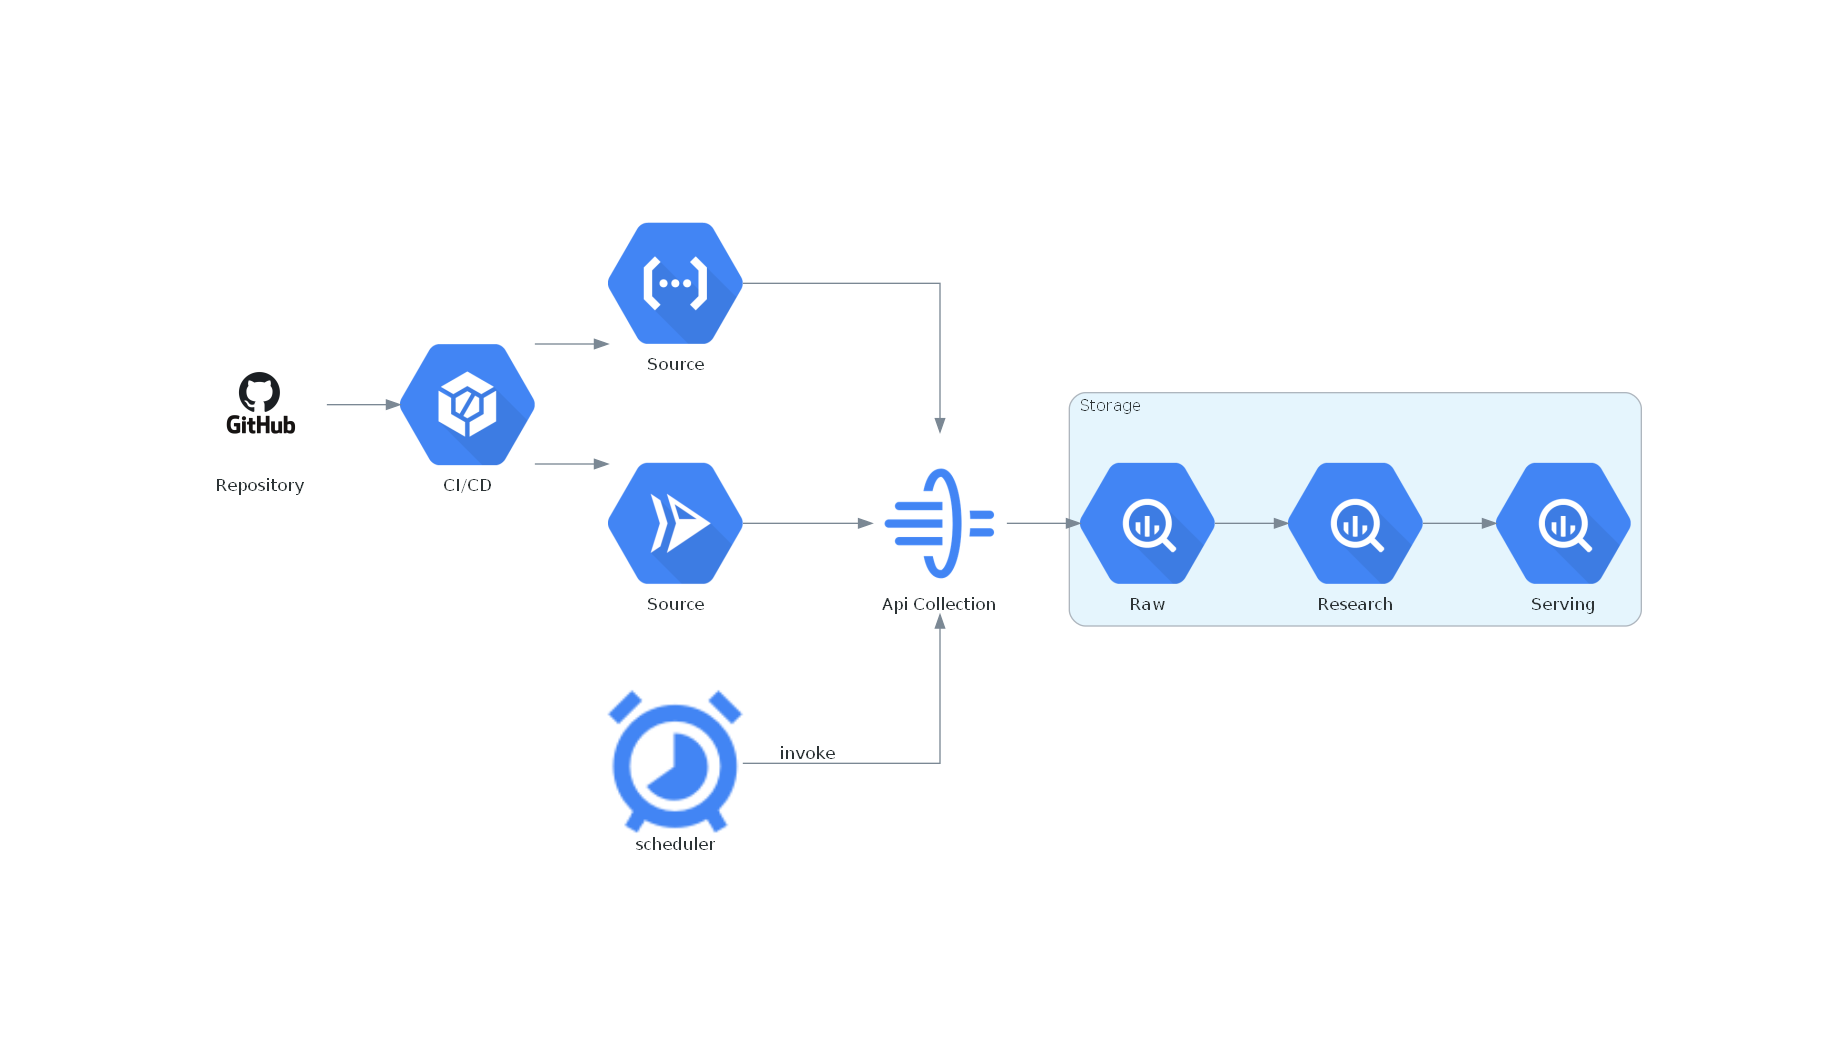

In [137]:
diag